In [4]:
from pathlib import Path

data_path = Path.cwd() / "data"
print(list(data_path.glob(pattern="*.csv")))

[PosixPath('/home/ishan/Desktop/programs/pythonfiles/misc/polars_dataloader/data/3.csv'), PosixPath('/home/ishan/Desktop/programs/pythonfiles/misc/polars_dataloader/data/2.csv'), PosixPath('/home/ishan/Desktop/programs/pythonfiles/misc/polars_dataloader/data/1.csv')]


In [6]:
import polars as pl

dataframes = list()
for path in data_path.glob(pattern="*.csv"):
    df = pl.scan_csv(path, dtypes={"TotalCharges": pl.String}).with_columns(
        pl.col("TotalCharges").str.replace(pattern=" ", value="0").alias("TotalCharges")
    )
    dataframes.append(df)
dataframe = pl.concat(dataframes)
print(type(dataframe))

<class 'polars.lazyframe.frame.LazyFrame'>


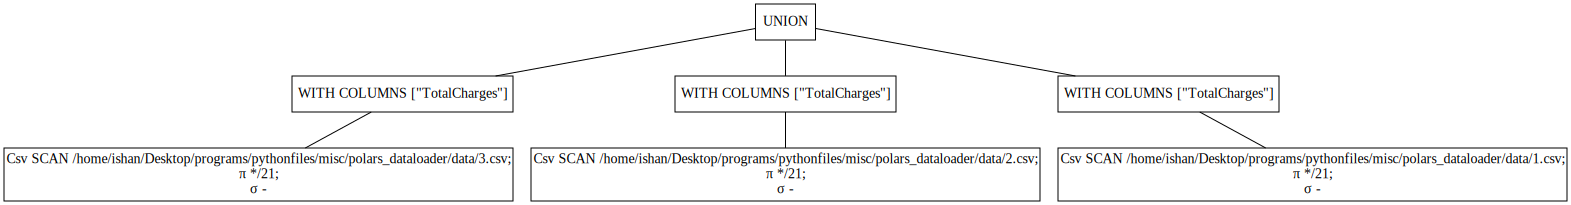

In [11]:
dataframe.show_graph(figsize=(3, 5))